## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df = pd.read_csv('Mall_Customers.csv')

In [3]:
#exploring first 5 rows in the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#general information about the data type,size etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#checking is there is any null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#checking is there is any duplicate values
df.duplicated().sum()

0

## Univariate Analysis

In [7]:
#quick statistical analysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


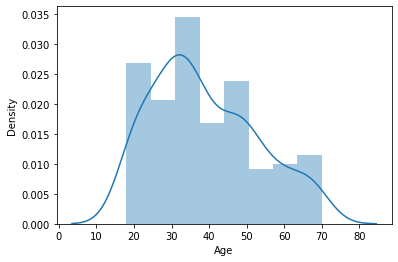

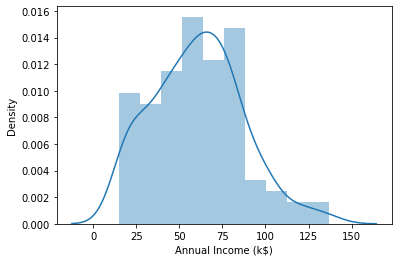

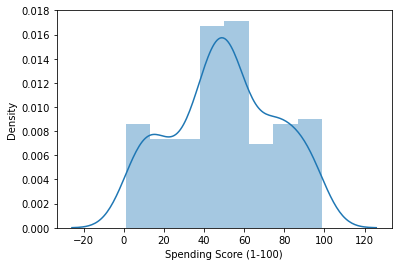

In [8]:
#checking the distribution of the variables
columns = list(df.describe().columns)
for name in columns[1:]:
    plt.figure()
    sns.distplot(df[name]);

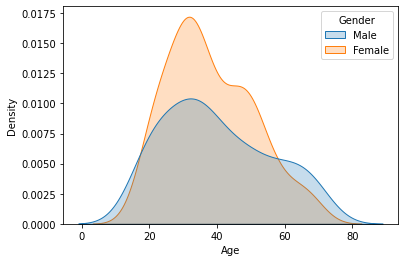

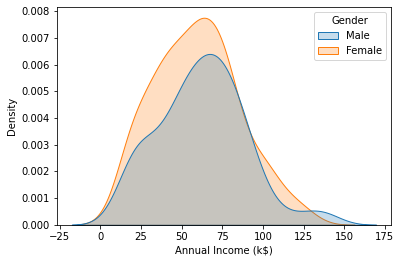

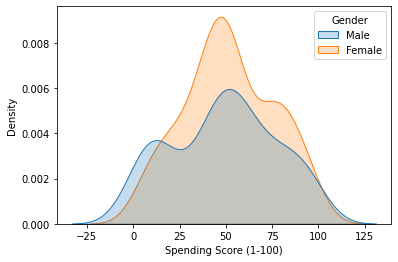

In [9]:
#checking the distribution of the variables of each gender
for name in columns[1:]:
    plt.figure()
    sns.kdeplot(df[name],shade = True , hue= df.Gender);

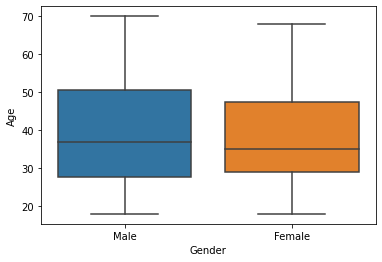

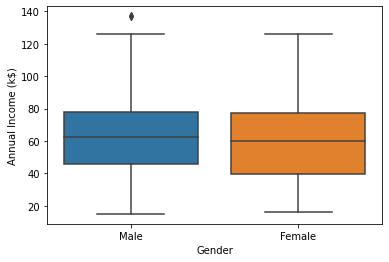

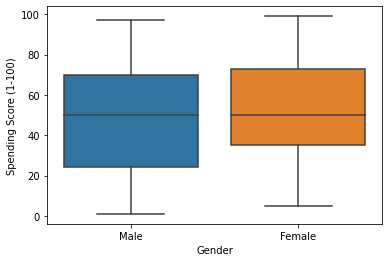

In [10]:
#plotting box plot
for name in columns[1:]:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[name]);

In [11]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

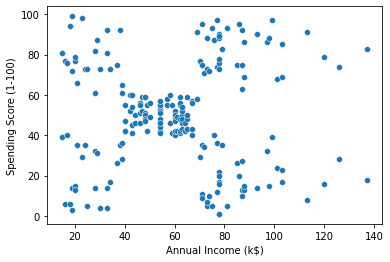

In [12]:
#scatter plot to find relationship between variables
sns.scatterplot(data=df , x='Annual Income (k$)', y = 'Spending Score (1-100)');

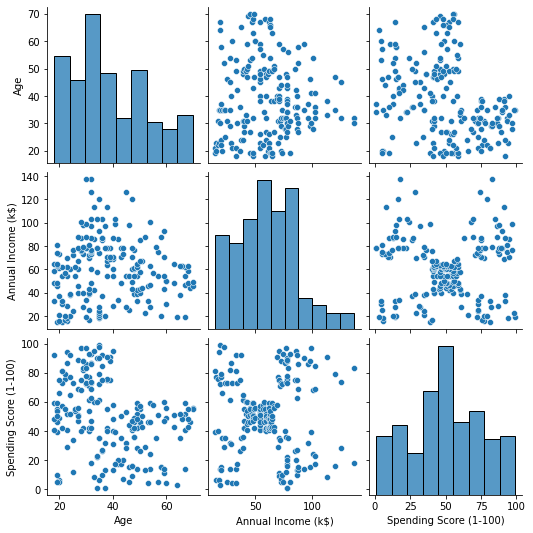

In [13]:
sns.pairplot(df[[ 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]);

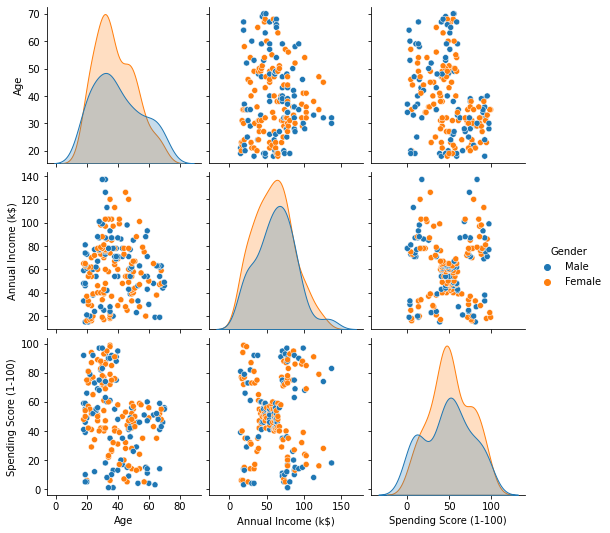

In [14]:
sns.pairplot(df[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']],hue='Gender');

In [15]:
df.groupby(['Gender'])[columns[1:]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
correlation_mat = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].corr()
correlation_mat

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


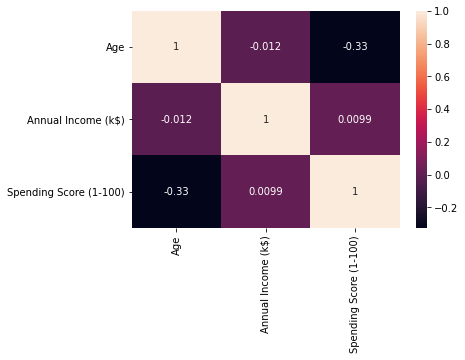

In [17]:
sns.heatmap(correlation_mat, annot = True);

# Clustering - Univariate, Bivariate, Multivariate

## Univariate Clustering

In [18]:
cluster1 = KMeans()

In [19]:
cluster1.fit(df[['Annual Income (k$)']])

KMeans()

In [20]:
cluster1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3])

In [21]:
df['Income Cluster'] = cluster1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


In [22]:
df['Income Cluster'].value_counts()

5    42
2    36
6    30
4    30
1    26
7    16
0    14
3     6
Name: Income Cluster, dtype: int64

In [23]:
cluster1.inertia_

2836.339987789987

In [24]:
#finding out how many clusters is best using elbow method
inertia_scores = []
for i in range(1,11,1):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

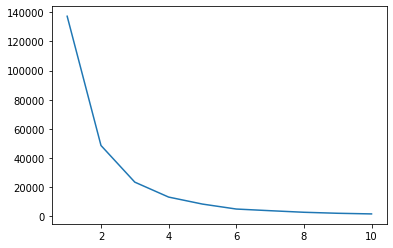

In [25]:
plt.plot(range(1,11), inertia_scores)

In [26]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = kmeans.labels_
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [27]:
df.groupby('Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


## Bivariate Clustering

In [28]:
cluster2 = KMeans()
cluster2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =cluster2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


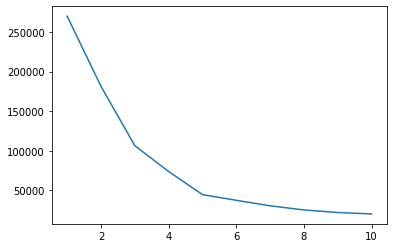

In [29]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [30]:
cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =cluster2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,1


In [31]:
cluster2.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

In [32]:
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,86.538462,82.128205
1,26.304348,20.913043
2,88.200000,17.114286
3,55.296296,49.518519
4,25.727273,79.363636


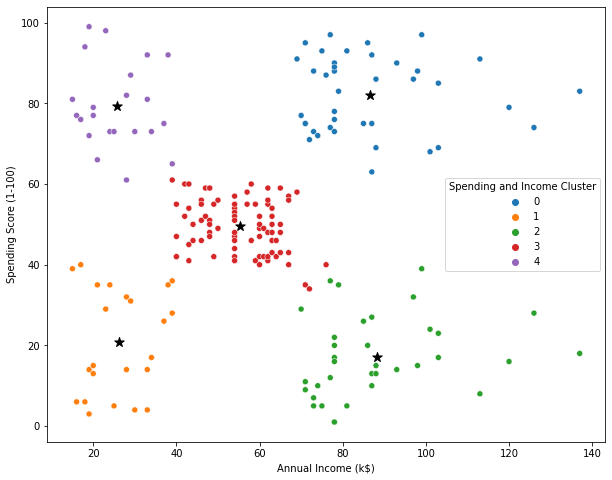

In [33]:
plt.figure(figsize =(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data = df, x ='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette = 'tab10');

In [34]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.457143,0.542857
3,0.592593,0.407407
4,0.590909,0.409091


In [35]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636


## Multivariante Clustering

In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,1


In [38]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,1,1
1,2,21,15,81,1,4,1
2,3,20,16,6,1,1,0
3,4,23,16,77,1,4,0
4,5,31,17,40,1,1,0


In [39]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [40]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [41]:
dff = scale.fit_transform(dff)

In [42]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


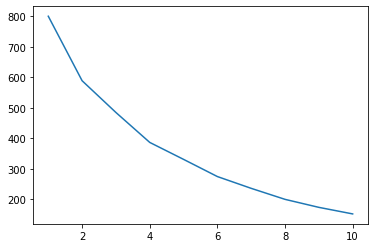

In [43]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [44]:
cluster3 = KMeans(n_clusters=4)
cluster3.fit(dff)
df['Last Cluster'] =cluster3.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Last Cluster
0,1,Male,19,15,39,1,1,3
1,2,Male,21,15,81,1,4,3
2,3,Female,20,16,6,1,1,2
3,4,Female,23,16,77,1,4,1
4,5,Female,31,17,40,1,1,2
